# Anamoly Detection 

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading and concatinating the training data
train_data = pd.read_csv("training100.csv")


In [ ]:
train_data

,timestamp,kpi_value,request_count,anomaly_label
0,2020-08-14T02:00:00.000+02:00,0.998755,24908,0
1,2020-08-14T02:01:00.000+02:00,0.997683,25029,0
2,2020-08-14T02:02:00.000+02:00,0.998341,24115,0
3,2020-08-14T02:03:00.000+02:00,0.998211,24031,0
4,2020-08-14T02:04:00.000+02:00,0.998403,23790,0
...,...,...,...,...
20154,2020-08-28T01:56:00.000+02:00,0.998149,26467,0
20155,2020-08-28T01:57:00.000+02:00,0.998340,26502,0
20156,2020-08-28T01:58:00.000+02:00,0.998364,26887,0
20157,2020-08-28T01:59:00.000+02:00,0.998428,26712,0


In [ ]:
train_data['anomaly_label'].value_counts()

0    19469
1      690
Name: anomaly_label, dtype: int64

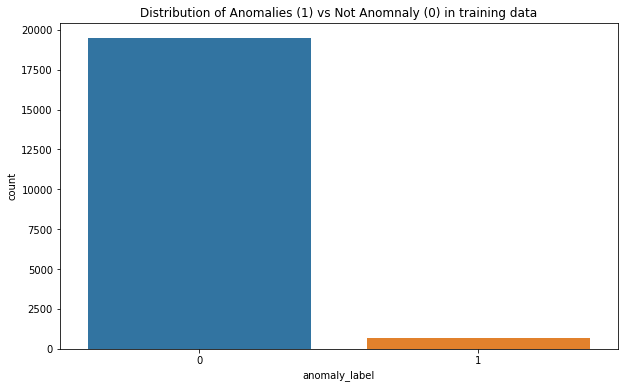

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='anomaly_label',data=train_data)
plt.title('Distribution of Anomalies (1) vs Not Anomnaly (0) in training data');

In [ ]:
# making lags for kpi value column
lags = [1,2,3,4,5] # using 5 previous days data to predict whether today will be anomaly or not
# no of lags can also be a hyper-parameter
for i in lags:
    train_data['value_lag'+str(i)] = train_data['kpi_value'].shift(i)

In [ ]:
train_data

,timestamp,kpi_value,request_count,anomaly_label,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,2020-08-14T02:00:00.000+02:00,0.998755,24908,0,NaN,NaN,NaN,NaN,NaN
1,2020-08-14T02:01:00.000+02:00,0.997683,25029,0,0.998755,NaN,NaN,NaN,NaN
2,2020-08-14T02:02:00.000+02:00,0.998341,24115,0,0.997683,0.998755,NaN,NaN,NaN
3,2020-08-14T02:03:00.000+02:00,0.998211,24031,0,0.998341,0.997683,0.998755,NaN,NaN
4,2020-08-14T02:04:00.000+02:00,0.998403,23790,0,0.998211,0.998341,0.997683,0.998755,NaN
...,...,...,...,...,...,...,...,...,...
20154,2020-08-28T01:56:00.000+02:00,0.998149,26467,0,0.998388,0.998274,0.998319,0.998884,0.998535
20155,2020-08-28T01:57:00.000+02:00,0.998340,26502,0,0.998149,0.998388,0.998274,0.998319,0.998884
20156,2020-08-28T01:58:00.000+02:00,0.998364,26887,0,0.998340,0.998149,0.998388,0.998274,0.998319
20157,2020-08-28T01:59:00.000+02:00,0.998428,26712,0,0.998364,0.998340,0.998149,0.998388,0.998274


In [ ]:
y = train_data['anomaly_label']
train_data.drop(columns=['kpi_value','anomaly_label'],axis=1,inplace=True)
train_data['label'] = y

In [ ]:
train_data

,timestamp,request_count,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5,label
0,2020-08-14T02:00:00.000+02:00,24908,NaN,NaN,NaN,NaN,NaN,0
1,2020-08-14T02:01:00.000+02:00,25029,0.998755,NaN,NaN,NaN,NaN,0
2,2020-08-14T02:02:00.000+02:00,24115,0.997683,0.998755,NaN,NaN,NaN,0
3,2020-08-14T02:03:00.000+02:00,24031,0.998341,0.997683,0.998755,NaN,NaN,0
4,2020-08-14T02:04:00.000+02:00,23790,0.998211,0.998341,0.997683,0.998755,NaN,0
...,...,...,...,...,...,...,...,...
20154,2020-08-28T01:56:00.000+02:00,26467,0.998388,0.998274,0.998319,0.998884,0.998535,0
20155,2020-08-28T01:57:00.000+02:00,26502,0.998149,0.998388,0.998274,0.998319,0.998884,0
20156,2020-08-28T01:58:00.000+02:00,26887,0.998340,0.998149,0.998388,0.998274,0.998319,0
20157,2020-08-28T01:59:00.000+02:00,26712,0.998364,0.998340,0.998149,0.998388,0.998274,0


In [ ]:
train_data.dropna(inplace=True)
train_data.reset_index(drop=True,inplace=True)
train_data.isnull().sum()

timestamp        0
request_count    0
value_lag1       0
value_lag2       0
value_lag3       0
value_lag4       0
value_lag5       0
label            0
dtype: int64

# Testing Supervised Classification Algorithm on t1

In [ ]:
train_data.drop('timestamp',1,inplace=True)

In [ ]:
!pip install imblearn==0.0

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
int(len(train_data) * .99)

19952

In [ ]:
# 1. Splitting Data into training and test - 80-20

#t1['timestamp'] =  pd.to_datetime(t1['timestamp'])
#t1['timestamp'] = np.asarray(t1['timestamp']).astype('float32')
#test_data['timestamp'] =  pd.to_datetime(test_data['timestamp'])
#test_data['timestamp'] = np.asarray(test_data['timestamp']).astype('float32')


train_test_split = int(len(train_data) * .99)

train_set = train_data[:train_test_split]
test_set = train_data[train_test_split:]
train_labels = train_set.pop('label')
test_labels = test_set.pop('label')

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
# Implementing Undersampling for Handling Imbalanced 
#nm = NearMiss()
# Implementing Oversampling for Handling Imbalanced 
#smk = SMOTETomek(random_state=42)
#train_set,train_labels=nm.fit_sample(train_set,train_labels)
 


#train_set = pd.to_datetime(train_set)
#test_set = pd.to_datetime(test_set)
#train_set = np.asarray(train_set).astype('float32')
#test_set= np.asarray(test_set).astype('float32')

In [ ]:
train_set

,request_count,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,23740,0.998403,0.998211,0.998341,0.997683,0.998755
1,23705,0.998315,0.998403,0.998211,0.998341,0.997683
2,23292,0.998481,0.998315,0.998403,0.998211,0.998341
3,23288,0.998712,0.998481,0.998315,0.998403,0.998211
4,23412,0.999055,0.998712,0.998481,0.998315,0.998403
...,...,...,...,...,...,...
19947,14307,0.996369,0.995467,0.995441,0.995355,0.994823
19948,14290,0.996715,0.996369,0.995467,0.995441,0.995355
19949,15258,0.995101,0.996715,0.996369,0.995467,0.995441
19950,14810,0.995609,0.995101,0.996715,0.996369,0.995467


In [ ]:
#scaler = StandardScaler()
#train_set = scaler.fit_transform(train_set) # Only normalize on the train set
#test_set = scaler.transform(test_set)

# clip() ensures all values fall within the range [-5,5]
# useful if any outliers remain after normalizing
#train_set = np.clip(train_set, 0, 1)
#test_set = np.clip(test_set, 0, 1)

In [ ]:
weight_for_non_fraud = 1.0 / train_data['label'].value_counts()[0]
weight_for_fraud = 1.0 / train_data['label'].value_counts()[1]

class_weight = {0: weight_for_non_fraud, 1: weight_for_fraud}

In [ ]:
!pip install tensorflow==2.3.1

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import json
import matplotlib as mpl

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS):
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_set.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid'),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 512

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [ ]:

results = model.fit(
    train_set,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(test_set, test_labels),
    class_weight=class_weight)

Epoch 1/100
39/39 [==============================] - 1s 24ms/step - loss: 0.1210 - tp: 478.0000 - fp: 13757.0000 - tn: 5505.0000 - fn: 212.0000 - accuracy: 0.2999 - precision: 0.0336 - recall: 0.6928 - auc: 0.4904 - val_loss: 1248.5449 - val_tp: 0.0000e+00 - val_fp: 202.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0850 - tp: 405.0000 - fp: 10989.0000 - tn: 8273.0000 - fn: 285.0000 - accuracy: 0.4349 - precision: 0.0355 - recall: 0.5870 - auc: 0.5063 - val_loss: 571.5248 - val_tp: 0.0000e+00 - val_fp: 202.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0640 - tp: 397.0000 - fp: 11059.0000 - tn: 8203.0000 - fn: 293.0000 - accuracy: 0.4310 

In [ ]:
predicted = model.predict(test_set)

y_pred = []

for i in predicted.tolist():
  y_pred.append(int(round(i[0])))

In [ ]:
test_set


,request_count,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
19952,15119,0.996494,0.996016,0.995609,0.995101,0.996715
19953,15134,0.995568,0.996494,0.996016,0.995609,0.995101
19954,14766,0.996168,0.995568,0.996494,0.996016,0.995609
19955,14680,0.996952,0.996168,0.995568,0.996494,0.996016
19956,14970,0.996322,0.996952,0.996168,0.995568,0.996494
...,...,...,...,...,...,...
20149,26467,0.998388,0.998274,0.998319,0.998884,0.998535
20150,26502,0.998149,0.998388,0.998274,0.998319,0.998884
20151,26887,0.998340,0.998149,0.998388,0.998274,0.998319
20152,26712,0.998364,0.998340,0.998149,0.998388,0.998274


In [ ]:
print(y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
cm = confusion_matrix(test_labels, y_pred)
print(cm)

[[  0 202]
 [  0   0]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
                
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


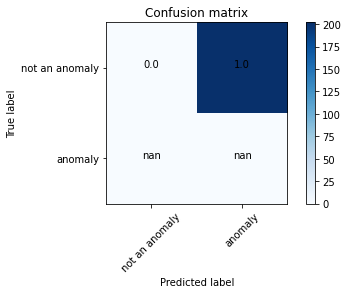

In [ ]:
classes = ['not an anomaly', 'anomaly']
plot_confusion_matrix(cm, classes, normalize=True)

In [ ]:
f1_score(y_pred,test_labels)

0.0

In [ ]:

t2 = pd.read_csv('dataset_106.csv')
t22 = pd.read_csv('dataset_106.csv')
t2


,timestamp,kpi_value,request_count
0,2020-08-17T02:00:00.000+02:00,1.0,1
1,2020-08-17T02:06:00.000+02:00,1.0,1
2,2020-08-17T02:08:00.000+02:00,1.0,1
3,2020-08-17T02:09:00.000+02:00,1.0,1
4,2020-08-17T02:15:00.000+02:00,1.0,1
...,...,...,...
14116,2020-08-31T01:55:00.000+02:00,0.5,2
14117,2020-08-31T01:56:00.000+02:00,1.0,1
14118,2020-08-31T01:57:00.000+02:00,1.0,1
14119,2020-08-31T01:58:00.000+02:00,1.0,3


In [ ]:
# making lags for kpi value column
lags = [1,2,3,4,5] # using 5 previous days data to predict whether today will be anomaly or not
# no of lags can also be a hyper-parameter
for i in lags:
    t2['value_lag'+str(i)] = t2['kpi_value'].shift(i)

In [ ]:
t2

,timestamp,kpi_value,request_count,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,2020-08-17T02:00:00.000+02:00,1.0,1,NaN,NaN,NaN,NaN,NaN
1,2020-08-17T02:06:00.000+02:00,1.0,1,1.0,NaN,NaN,NaN,NaN
2,2020-08-17T02:08:00.000+02:00,1.0,1,1.0,1.0,NaN,NaN,NaN
3,2020-08-17T02:09:00.000+02:00,1.0,1,1.0,1.0,1.0,NaN,NaN
4,2020-08-17T02:15:00.000+02:00,1.0,1,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...
14116,2020-08-31T01:55:00.000+02:00,0.5,2,1.0,1.0,0.5,0.0,1.0
14117,2020-08-31T01:56:00.000+02:00,1.0,1,0.5,1.0,1.0,0.5,0.0
14118,2020-08-31T01:57:00.000+02:00,1.0,1,1.0,0.5,1.0,1.0,0.5
14119,2020-08-31T01:58:00.000+02:00,1.0,3,1.0,1.0,0.5,1.0,1.0


In [ ]:
t2.dropna(inplace=True)
t2.reset_index(drop=True,inplace=True)
t2.isnull().sum()


timestamp        0
kpi_value        0
request_count    0
value_lag1       0
value_lag2       0
value_lag3       0
value_lag4       0
value_lag5       0
dtype: int64

In [ ]:
t2

,timestamp,kpi_value,request_count,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,2020-08-17T02:23:00.000+02:00,1.0,1,1.0,1.0,1.0,1.0,1.0
1,2020-08-17T02:27:00.000+02:00,1.0,2,1.0,1.0,1.0,1.0,1.0
2,2020-08-17T02:29:00.000+02:00,1.0,1,1.0,1.0,1.0,1.0,1.0
3,2020-08-17T02:39:00.000+02:00,1.0,2,1.0,1.0,1.0,1.0,1.0
4,2020-08-17T02:41:00.000+02:00,1.0,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
14111,2020-08-31T01:55:00.000+02:00,0.5,2,1.0,1.0,0.5,0.0,1.0
14112,2020-08-31T01:56:00.000+02:00,1.0,1,0.5,1.0,1.0,0.5,0.0
14113,2020-08-31T01:57:00.000+02:00,1.0,1,1.0,0.5,1.0,1.0,0.5
14114,2020-08-31T01:58:00.000+02:00,1.0,3,1.0,1.0,0.5,1.0,1.0


In [ ]:
t2=t2.drop('kpi_value',axis=1) 

In [ ]:

t2

,timestamp,request_count,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
0,2020-08-17T02:23:00.000+02:00,1,1.0,1.0,1.0,1.0,1.0
1,2020-08-17T02:27:00.000+02:00,2,1.0,1.0,1.0,1.0,1.0
2,2020-08-17T02:29:00.000+02:00,1,1.0,1.0,1.0,1.0,1.0
3,2020-08-17T02:39:00.000+02:00,2,1.0,1.0,1.0,1.0,1.0
4,2020-08-17T02:41:00.000+02:00,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
14111,2020-08-31T01:55:00.000+02:00,2,1.0,1.0,0.5,0.0,1.0
14112,2020-08-31T01:56:00.000+02:00,1,0.5,1.0,1.0,0.5,0.0
14113,2020-08-31T01:57:00.000+02:00,1,1.0,0.5,1.0,1.0,0.5
14114,2020-08-31T01:58:00.000+02:00,3,1.0,1.0,0.5,1.0,1.0


In [ ]:
t2.drop('timestamp',axis=1,inplace=True)

In [ ]:

#t2 = scaler.fit_transform(t2) # Only normalize on the train set
# clip() ensures all values fall within the range [-5,5]
# useful if any outliers remain after normalizing
#t2 = np.clip(t2, 0, 1)


In [ ]:
t2.shape

(14116, 6)

In [ ]:
#t2['timestamp'] =  pd.to_datetime(t2['timestamp'])
#t2['timestamp'] = np.asarray(t2['timestamp']).astype('float32')
predicted = model.predict(t2)

y_pred1 = []

for i in predicted.tolist():
  y_pred1.append(int(round(i[0])))

In [ ]:
type(y_pred1)

list

In [ ]:
solution = pd.DataFrame(data=y_pred1,columns=['Predictions'])

In [ ]:
solution

,Predictions
0,1
1,1
2,1
3,1
4,1
...,...
14111,1
14112,1
14113,1
14114,1


In [ ]:
solution['Predictions'].value_counts()

1    13756
0      360
Name: Predictions, dtype: int64

In [ ]:
t2["predicted_label"] = y_pred1

In [ ]:
#t2.to_csv('Hackathon_solution_withoutTimestamp.csv')

In [ ]:
solution.to_csv('dataset_solution_106.csv')

In [ ]:
#t2['predicted_label'].value_counts()

In [ ]:
#t22